## Simple Linear Regression

In [1]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [2]:
library('ggplot2')

In [3]:
plot = ggplot(data=iris, aes(x=Petal.Width, y=Petal.Length)) + geom_point() + geom_smooth(method='lm') + theme_bw(base_size=14)

`geom_smooth()` using formula 'y ~ x'



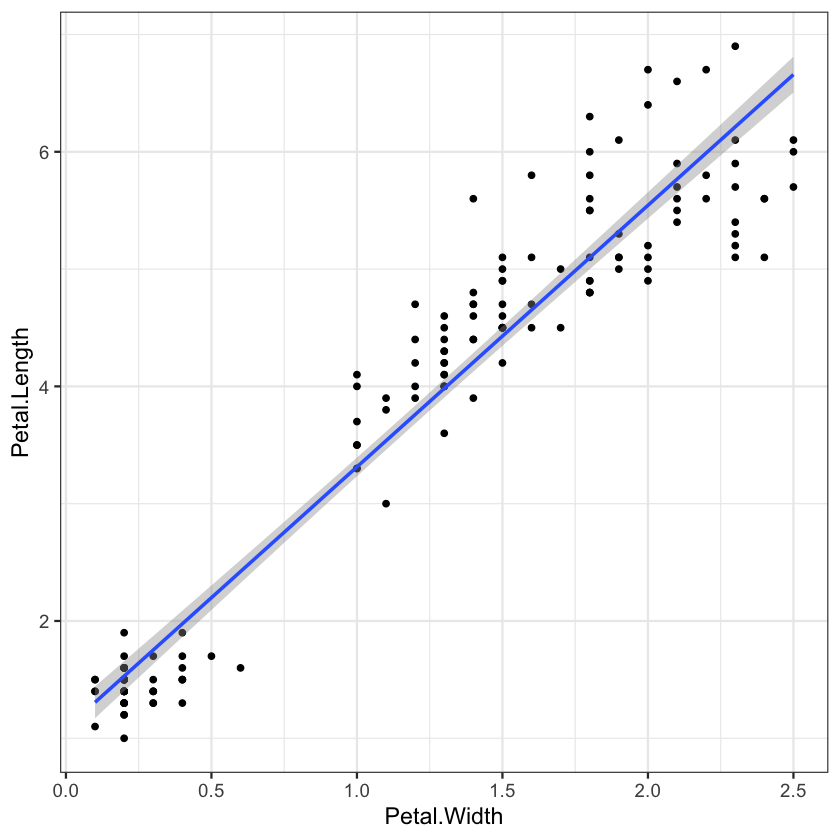

In [4]:
plot

In [5]:
cor(iris$Petal.Width, iris$Petal.Length)

[1] 0.9628654

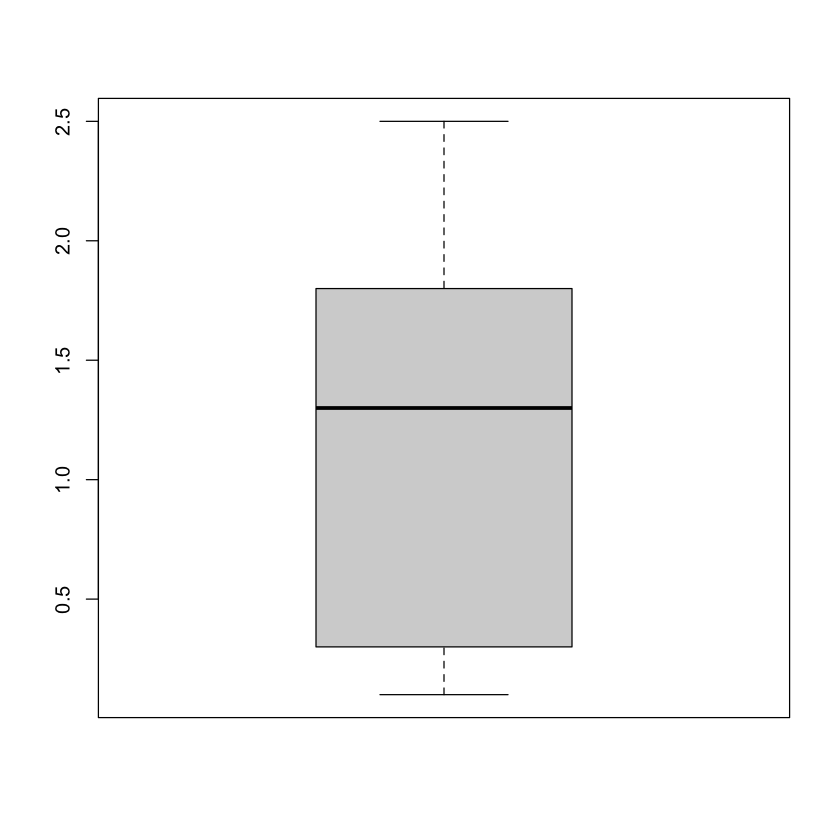

In [6]:
boxplot(iris$Petal.Width)

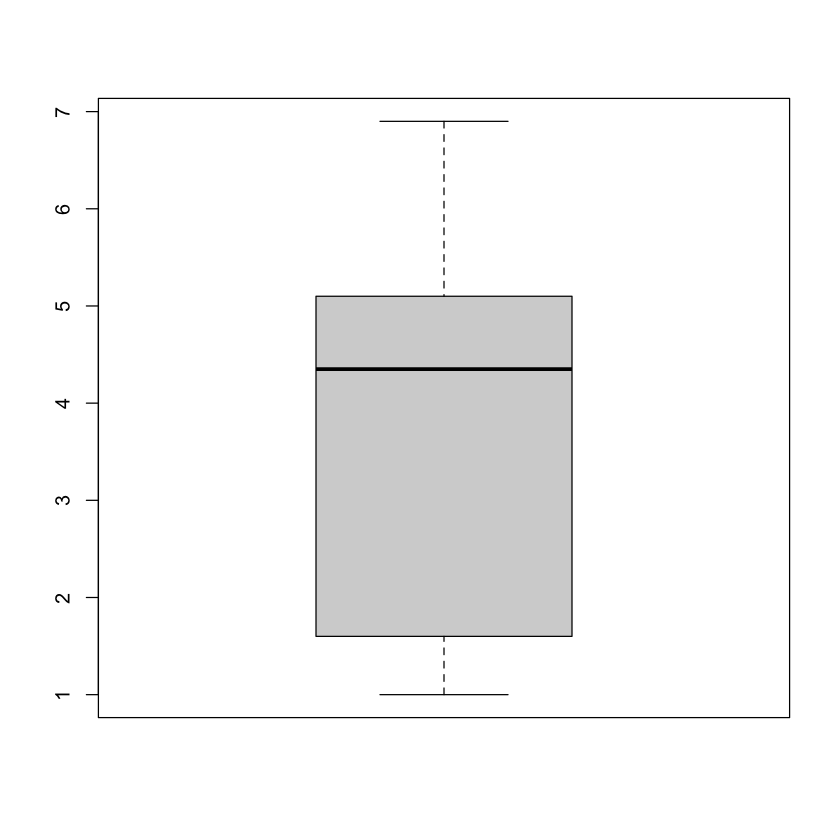

In [7]:
boxplot(iris$Petal.Length)

In [11]:
set.seed(42)
trainingRowIndex = sample(1:nrow(iris), 0.7*nrow(iris))
trainingData = iris[trainingRowIndex, ]
testData = iris[-trainingRowIndex, ]
head(trainingData)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
49,5.3,3.7,1.5,0.2,setosa
65,5.6,2.9,3.6,1.3,versicolor
74,6.1,2.8,4.7,1.2,versicolor
146,6.7,3.0,5.2,2.3,virginica
122,5.6,2.8,4.9,2.0,virginica
150,5.9,3.0,5.1,1.8,virginica


In [12]:
lmMod = lm(Petal.Length ~ Petal.Width, data=trainingData)
pred = predict(lmMod, testData)

In [13]:
mse = mean(lmMod$residuals^2)
mse

[1] 0.2299794

In [14]:
mse_test = mean((testData$Petal.Length - pred)^2)
mse_test

[1] 0.2171714

In [15]:
lmMod


Call:
lm(formula = Petal.Length ~ Petal.Width, data = trainingData)

Coefficients:
(Intercept)  Petal.Width  
      1.042        2.253  


In [22]:
coef(lmMod)

(Intercept) Petal.Width 
   1.041753    2.253255

In [18]:
coef(lmMod)['Petal.Width']

Petal.Width 
   2.253255

In [19]:
coef(lmMod)['(Intercept)']

(Intercept) 
   1.041753

In [27]:
x = c(0, 1.5, 2.6)
y = predict(lmMod, data.frame(Petal.Width = x))
y

1        2        3 
1.041753 4.421636 6.900216

ERROR: Error in +lines(x, y, col = "red"): invalid argument to unary operator


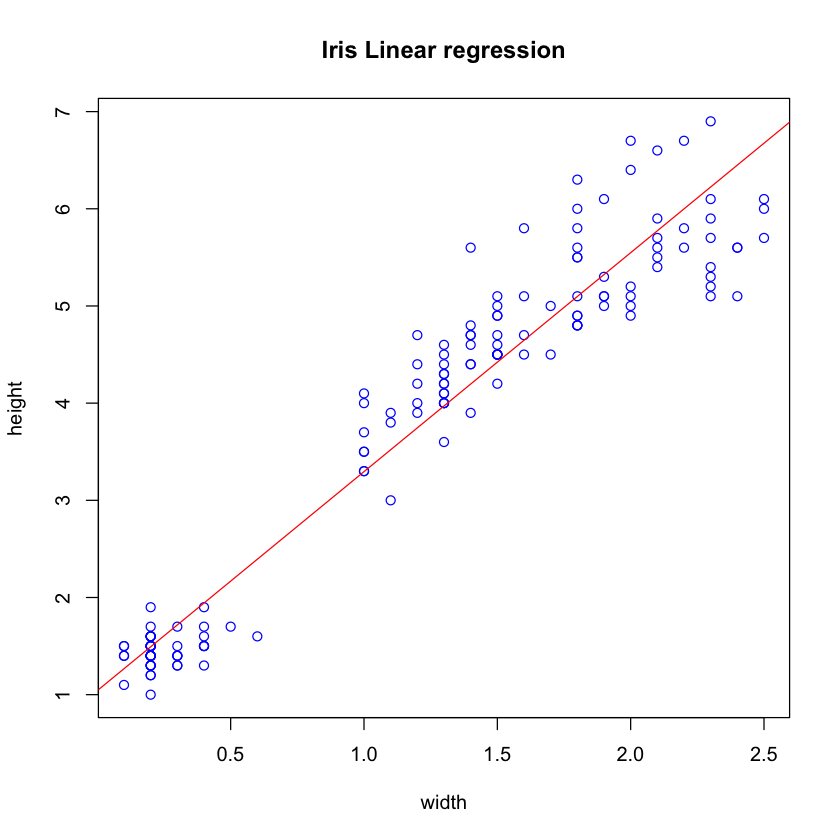

In [32]:
plot(iris$Petal.Width, iris$Petal.Length, main= 'Iris Linear regression', xlab='width', ylab='height', col='blue') 
+ lines(x, y, col='red')